In [1]:
# import dependenices
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Weather base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

f Set 4 | new norfolk
Processing Record 14 of Set 4 | lavrentiya
Processing Record 15 of Set 4 | portland
Processing Record 16 of Set 4 | muravlenko
Processing Record 17 of Set 4 | cidreira
Processing Record 18 of Set 4 | mindelo
Processing Record 19 of Set 4 | port elizabeth
Processing Record 20 of Set 4 | voyvozh
Processing Record 21 of Set 4 | rawson
Processing Record 22 of Set 4 | hailar
Processing Record 23 of Set 4 | aljezur
Processing Record 24 of Set 4 | westport
Processing Record 25 of Set 4 | aflu
City not found. Skipping...
Processing Record 26 of Set 4 | la union
Processing Record 27 of Set 4 | port alfred
Processing Record 28 of Set 4 | quatre cocos
Processing Record 29 of Set 4 | rantepao
Processing Record 30 of Set 4 | srednekolymsk
Processing Record 31 of Set 4 | inta
Processing Record 32 of Set 4 | esperance
Processing Record 33 of Set 4 | saint-philippe
Processing Record 34 of Set 4 | bereda
Processing Record 35 of Set 4 | gebre guracha
Processing Record 36 of Set 4 |

In [12]:
len(city_data)

584

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atagay,55.1033,99.3875,53.49,91,12,2.51,RU,2021-07-11 22:02:09
1,Saint George,37.1041,-113.5841,113.47,13,1,1.99,US,2021-07-11 21:57:25
2,Atuona,-9.8000,-139.0333,77.23,80,46,25.08,PF,2021-07-11 22:02:10
3,Dikson,73.5069,80.5464,33.60,99,100,15.37,RU,2021-07-11 22:02:10
4,Grindavik,63.8424,-22.4338,55.56,100,90,14.97,IS,2021-07-11 22:02:10
5,Sobolevo,54.4299,31.8996,69.37,75,76,5.75,RU,2021-07-11 22:02:11
6,Shimoda,34.6667,138.9500,77.11,86,99,0.65,JP,2021-07-11 21:58:11
7,Matara,5.9485,80.5353,78.31,87,100,16.02,LK,2021-07-11 22:02:11
8,Rincon,32.2960,-81.2354,87.22,73,75,1.99,US,2021-07-11 22:02:11
9,Coffs Harbour,-30.3000,153.1333,50.13,93,75,2.30,AU,2021-07-11 22:02:12


In [16]:
# reorder columns
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atagay,RU,2021-07-11 22:02:09,55.1033,99.3875,53.49,91,12,2.51
1,Saint George,US,2021-07-11 21:57:25,37.1041,-113.5841,113.47,13,1,1.99
2,Atuona,PF,2021-07-11 22:02:10,-9.8000,-139.0333,77.23,80,46,25.08
3,Dikson,RU,2021-07-11 22:02:10,73.5069,80.5464,33.60,99,100,15.37
4,Grindavik,IS,2021-07-11 22:02:10,63.8424,-22.4338,55.56,100,90,14.97
5,Sobolevo,RU,2021-07-11 22:02:11,54.4299,31.8996,69.37,75,76,5.75
6,Shimoda,JP,2021-07-11 21:58:11,34.6667,138.9500,77.11,86,99,0.65
7,Matara,LK,2021-07-11 22:02:11,5.9485,80.5353,78.31,87,100,16.02
8,Rincon,US,2021-07-11 22:02:11,32.2960,-81.2354,87.22,73,75,1.99
9,Coffs Harbour,AU,2021-07-11 22:02:12,-30.3000,153.1333,50.13,93,75,2.30


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

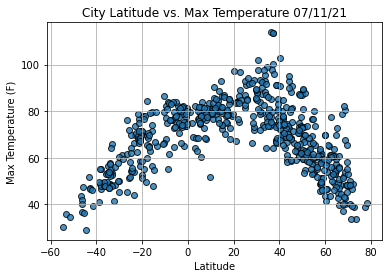

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

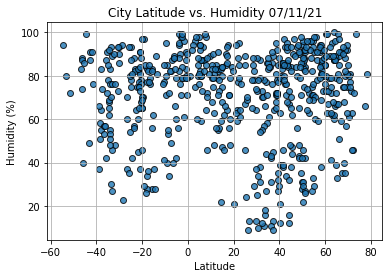

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

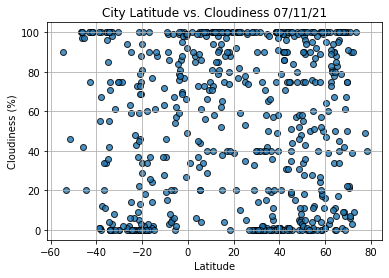

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

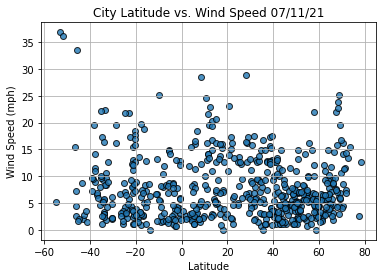

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()